# Kmeans drawback

Kmeans algorithm is good in capturing structure of the data if clusters have a spherical-like shape. It always try to construct a nice spherical shape around the centroid. That means, the minute the clusters have a complicated geometric shapes, kmeans does a poor job in clustering the data. We’ll illustrate three cases where kmeans will not perform well.
First, kmeans algorithm doesn’t let data points that are far-away from each other share the same cluster even though they obviously belong to the same cluster. Below is an example of data points on two different horizontal lines that illustrates how kmeans tries to group half of the data points of each horizontal lines together.
https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

In [6]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

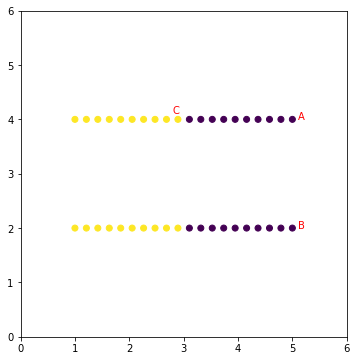

In [7]:
# Create horizantal data
X = np.tile(np.linspace(1, 5, 20), 2)
y = np.repeat(np.array([2, 4]), 20)
df = np.c_[X, y]

km = KMeans(n_clusters=2)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X, y, c=labels) # as cluster =2, use labeles [1,2] to represent the color to make difference
plt.xlim([0, 6])
plt.ylim([0, 6])
plt.text(5.1, 4, 'A', color='red')
plt.text(5.1, 2, 'B', color='red')
plt.text(2.8, 4.1, 'C', color='red')
ax.set_aspect('equal')


# Comments 

Kmeans considers the point ‘B’ closer to point ‘A’ than point ‘C’ since they have non-spherical shape. Therefore, points ‘A’ and ‘B’ will be in the same cluster but point ‘C’ will be in a different cluster. Note the Single Linkage hierarchical clustering method gets this right because it doesn’t separate similar points).

centroids is : [[6.85747748 6.62030344]
 [4.0028753  0.13263673]
 [4.54126064 5.29310767]]


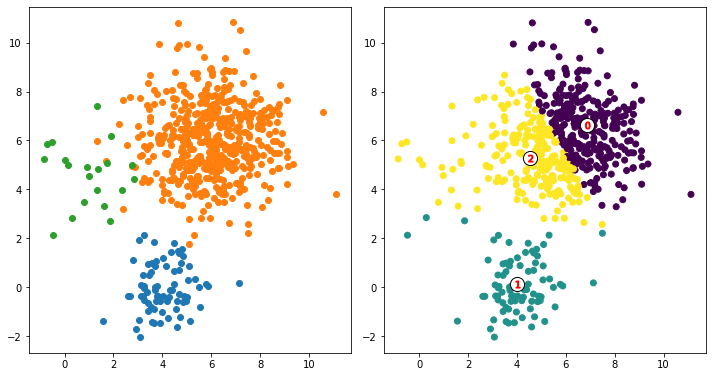

In [14]:
# Create data from three different multivariate distributions
X_1 = np.random.multivariate_normal(mean=[4, 0], cov=[[1, 0], [0, 1]], size=75) #75x2 array
X_2 = np.random.multivariate_normal(mean=[6, 6], cov=[[2, 0], [0, 2]], size=500)# 500x2 array 
X_3 = np.random.multivariate_normal(mean=[1, 5], cov=[[1, 0], [0, 2]], size=20) # 20x2 array
df = np.concatenate([X_1, X_2, X_3]) 

#print(df)

# Run kmeans
km = KMeans(n_clusters=3)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

print("centroids is :", centroids)

# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].scatter(X_1[:, 0], X_1[:, 1])
ax[0].scatter(X_2[:, 0], X_2[:, 1])
ax[0].scatter(X_3[:, 0], X_3[:, 1])
ax[0].set_aspect('equal')
ax[1].scatter(df[:, 0], df[:, 1], c=labels) # use color to identify different labels
ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k') # will draw a circle in centroids
for i, c in enumerate(centroids):
    ax[1].scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r') # will add a number in each centroid
ax[1].set_aspect('equal')
plt.tight_layout()

# np.random.multivariate_normal
https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
Draw random samples from a multivariate normal distribution.

The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix. These parameters are analogous to the mean (average or “center”) and variance (standard deviation, or “width,” squared) of the one-dimensional normal distribution.

Note

New code should use the multivariate_normal method of a default_rng() instance instead; please see the Quick Start.

Parameters
mean1-D array_like, of length N
Mean of the N-dimensional distribution.

cov2-D array_like, of shape (N, N)
Covariance matrix of the distribution. It must be symmetric and positive-semidefinite for proper sampling.

sizeint or tuple of ints, optional
Given a shape of, for example, (m,n,k), m*n*k samples are generated, and packed in an m-by-n-by-k arrangement. Because each sample is N-dimensional, the output shape is (m,n,k,N). If no shape is specified, a single (N-D) sample is returned.

check_valid{ ‘warn’, ‘raise’, ‘ignore’ }, optional
Behavior when the covariance matrix is not positive semidefinite.

tolfloat, optional
Tolerance when checking the singular values in covariance matrix. cov is cast to double before the check.

# Comments
Looks like kmeans couldn’t figure out the clusters correctly. Since it tries to minimize the within-cluster variation, it gives more weight to bigger clusters than smaller ones. The cluster 2 and 0 are wrong. 

(array([[ 0.54165724,  0.03579227],
       [ 0.03342643,  0.46033603],
       [ 1.05423495,  0.20771326],
       ...,
       [ 0.9124575 ,  0.28480025],
       [-0.72662465, -0.64137443],
       [ 0.95178588,  0.36146728]]), array([1, 1, 0, ..., 0, 0, 0], dtype=int64))
(array([[ 0.81333335,  0.47421358],
       [-0.93819302,  0.28786248],
       [ 0.08077862,  0.3565108 ],
       ...,
       [ 0.63038481,  0.83616289],
       [ 0.55734908, -0.43269604],
       [ 0.87448975,  0.42585477]]), array([0, 0, 1, ..., 0, 1, 0], dtype=int64))


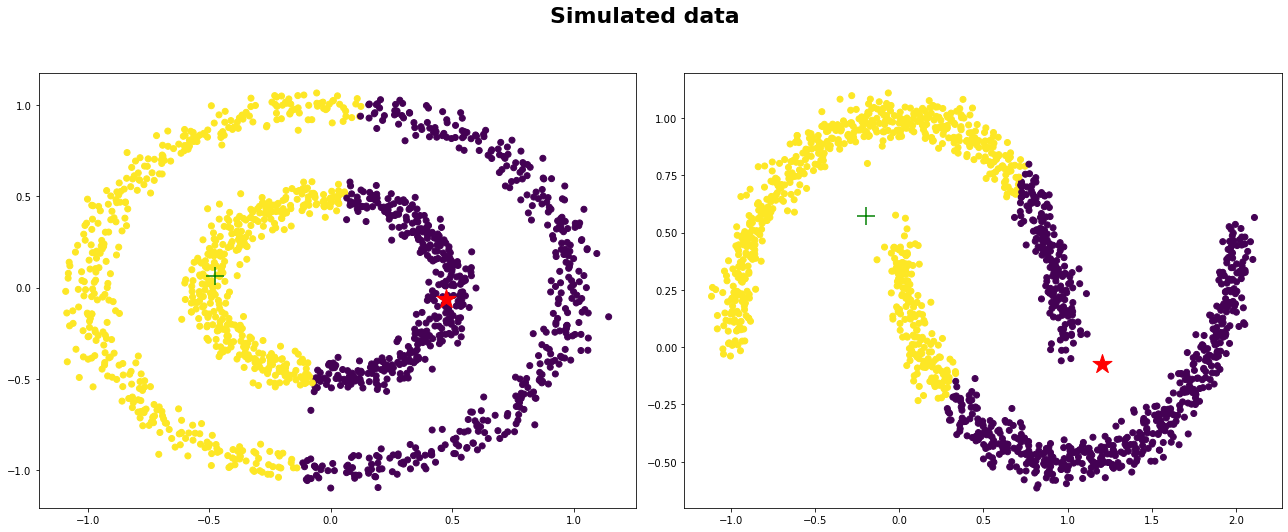

In [16]:
from sklearn.datasets import (make_blobs,make_circles,make_moons)
# Cricles
X1 = make_circles(factor=0.5, noise=0.05, n_samples=1500) #X1 will be a turple of two np arrays, X1[0] will be a array of two columns
print(X1)

# Moons
X2 = make_moons(n_samples=1500, noise=0.05) #same as X1
print(X2) 

fig, ax = plt.subplots(1, 2)
for i, X in enumerate([X1, X2]):
    fig.set_size_inches(18, 7)
    km = KMeans(n_clusters=2)
    km.fit(X[0])
    labels = km.predict(X[0])
    centroids = km.cluster_centers_

    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=labels)
    ax[i].scatter(centroids[0, 0], centroids[0, 1], marker='*', s=400, c='r')
    ax[i].scatter(centroids[1, 0], centroids[1, 1], marker='+', s=300, c='green')
plt.suptitle('Simulated data', y=1.05, fontsize=22, fontweight='semibold')
plt.tight_layout()

# Comments:
From above, the KMeans method can't figure out the correct cluster for both datasets. However, we can help kmeans perfectly cluster these kind of datasets if we use kernel methods. The idea is we transform to higher dimensional representation that make the data linearly separable (the same idea that we use in SVMs). Different kinds of algorithms work very well in such scenarios such as SpectralClustering, see below: 

C:\Users\T929189\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\T929189\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


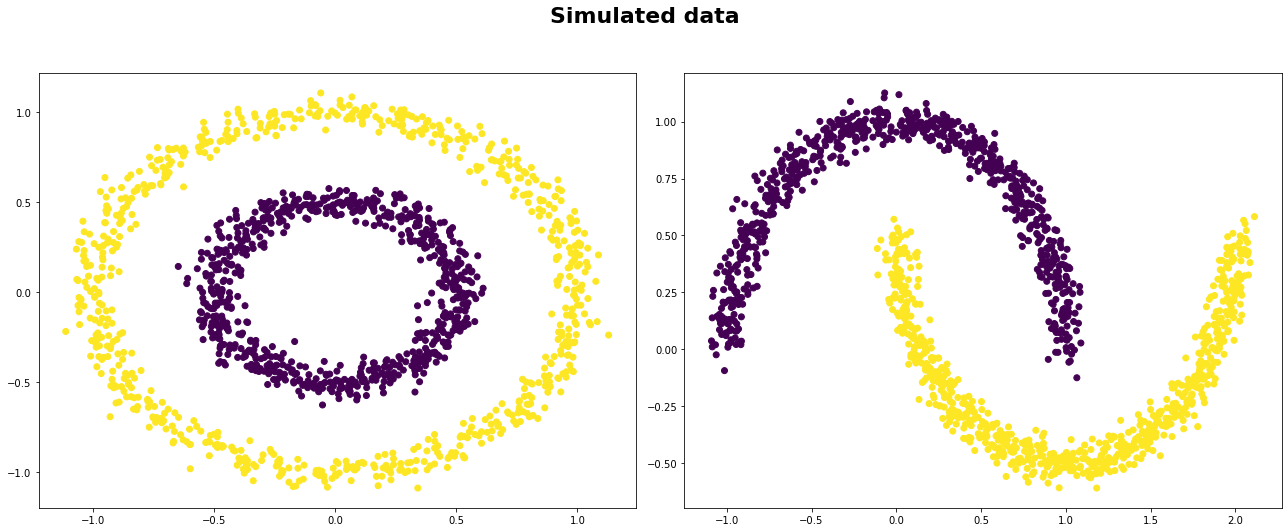

In [18]:
from sklearn.cluster import SpectralClustering
# Cricles
X1 = make_circles(factor=0.5, noise=0.05, n_samples=1500)

# Moons
X2 = make_moons(n_samples=1500, noise=0.05)

fig, ax = plt.subplots(1, 2)
for i, X in enumerate([X1, X2]):
    fig.set_size_inches(18, 7)
    sp = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
    sp.fit(X[0])
    labels = sp.labels_
    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=labels)
plt.suptitle('Simulated data', y=1.05, fontsize=22, fontweight='semibold')
plt.tight_layout();

# Conclusion

For geometric data clustering, we should use Spectral Clustering. 

Kmeans clustering is one of the most popular clustering algorithms and usually the first thing practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. The goal of kmeans is to group data points into distinct non-overlapping subgroups. It does a very good job when the clusters have a kind of spherical shapes. However, it suffers as the geometric shapes of clusters deviates from spherical shapes. Moreover, it also doesn’t learn the number of clusters from the data and requires it to be pre-defined. To be a good practitioner, it’s good to know the assumptions behind algorithms/methods so that you would have a pretty good idea about the strength and weakness of each method. This will help you decide when to use each method and under what circumstances. In this post, we covered both strength, weaknesses, and some evaluation methods related to kmeans.

Below are the main takeaways:

Scale/standardize the data when applying kmeans algorithm.

Elbow method in selecting number of clusters doesn’t usually work because the error function is monotonically decreasing for all ks.

Kmeans gives more weight to the bigger clusters.

Kmeans assumes spherical shapes of clusters (with radius equal to the distance between the centroid and the furthest data point) and doesn’t work well when clusters are in different shapes such as elliptical clusters.

If there is overlapping between clusters, kmeans doesn’t have an intrinsic measure for uncertainty for the examples belong to the overlapping region in order to determine for which cluster to assign each data point.

Kmeans may still cluster the data even if it can’t be clustered such as data that comes from uniform distributions.

In practice, what value of k should you use?  The k-nearest neighbor classifier requires a setting for k. But what number works best? Additionally, there are many different distance functions we could have used:
L1 norm (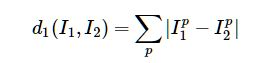,
and L2 norm:

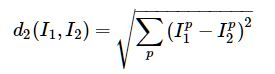

there are many other choices we didn’t even consider (e.g. dot products). These choices are called hyperparameters and they come up very often in the design of many Machine Learning algorithms that learn from data. It’s often not obvious what values/settings one should choose.

You might be tempted to suggest that we should try out many different values and see what works best. That is a fine idea and that’s indeed what we will do, but this must be done very carefully. In particular, we cannot use the test set for the purpose of tweaking hyperparameters. Whenever you’re designing Machine Learning algorithms, you should think of the test set as a very precious resource that should ideally never be touched until one time at the very end. Otherwise, the very real danger is that you may tune your hyperparameters to work well on the test set, but if you were to deploy your model you could see a significantly reduced performance. In practice, we would say that you overfit to the test set. Another way of looking at it is that if you tune your hyperparameters on the test set, you are effectively using the test set as the training set, and therefore the performance you achieve on it will be too optimistic with respect to what you might actually observe when you deploy your model. But if you only use the test set once at end, it remains a good proxy for measuring the generalization of your classifier (we will see much more discussion surrounding generalization later in the class).

Pros and Cons of Nearest Neighbor classifier used in image classification. (https://cs231n.github.io/classification/)

It is worth considering some advantages and drawbacks of the Nearest Neighbor classifier. Clearly, one advantage is that it is very simple to implement and understand. Additionally, the classifier takes no time to train, since all that is required is to store and possibly index the training data. However, we pay that computational cost at test time, since classifying a test example requires a comparison to every single training example. This is backwards, since in practice we often care about the test time efficiency much more than the efficiency at training time. In fact, the deep neural networks we will develop later in this class shift this tradeoff to the other extreme: They are very expensive to train, but once the training is finished it is very cheap to classify a new test example. This mode of operation is much more desirable in practice.

As an aside, the computational complexity of the Nearest Neighbor classifier is an active area of research, and several Approximate Nearest Neighbor (ANN) algorithms and libraries exist that can accelerate the nearest neighbor lookup in a dataset (e.g. FLANN). These algorithms allow one to trade off the correctness of the nearest neighbor retrieval with its space/time complexity during retrieval, and usually rely on a pre-processing/indexing stage that involves building a kdtree, or running the k-means algorithm.

The Nearest Neighbor Classifier may sometimes be a good choice in some settings (especially if the data is low-dimensional), but it is rarely appropriate for use in practical image classification settings. One problem is that images are high-dimensional objects (i.e. they often contain many pixels), and distances over high-dimensional spaces can be very counter-intuitive. The image below illustrates the point that the pixel-based L2 similarities we developed above are very different from perceptual similarities: